# Beginners Guide to Logistic Regression in Python
This notebook discusses Logistic Regression and the math behind it with a practical example and Python codes. Logistic regression is one of the fundamental algorithms meant for classification. Logistic regression is meant exclusively for binary classification problems. Nevertheless, multi-class classification can also be performed with this algorithm with some modifications.

References:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.html#statsmodels.discrete.discrete_model.Logit


# Define a Binary Classification Problem

Create Environment by importing necessary libraries

In [ ]:
!python -m pip install pip --upgrade --user -q
!python -m pip install numpy pandas seaborn matplotlib scipy statsmodels sklearn --user -q

In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import metrics

sns.set_style('darkgrid')

Load a binary classification problem from SciKit-Learn’s in-built datasets. The breast cancer data is a binary classification problem with two classes. Download the data and metadata using the following code.

In [2]:
raw_data = load_breast_cancer()

raw_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Read Description

We can read more about the loaded data using the DESCR file.

In [3]:
print(raw_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

The dataset contains 30 features and one target. Target has two classes: Malignant (cancerous state) and Benign (non-cancerous state).

Create a pandas dataframe for the features and a pandas series for the target.

In [4]:
data = pd.DataFrame(raw_data['data'], columns=raw_data['feature_names'])
target = pd.Series(raw_data['target'], name='target')
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


For more clarity, we proceed with only five selected features.

In [5]:
merge = pd.concat([data, target], axis=1)
merge.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Plot the data to understand inter-relationship

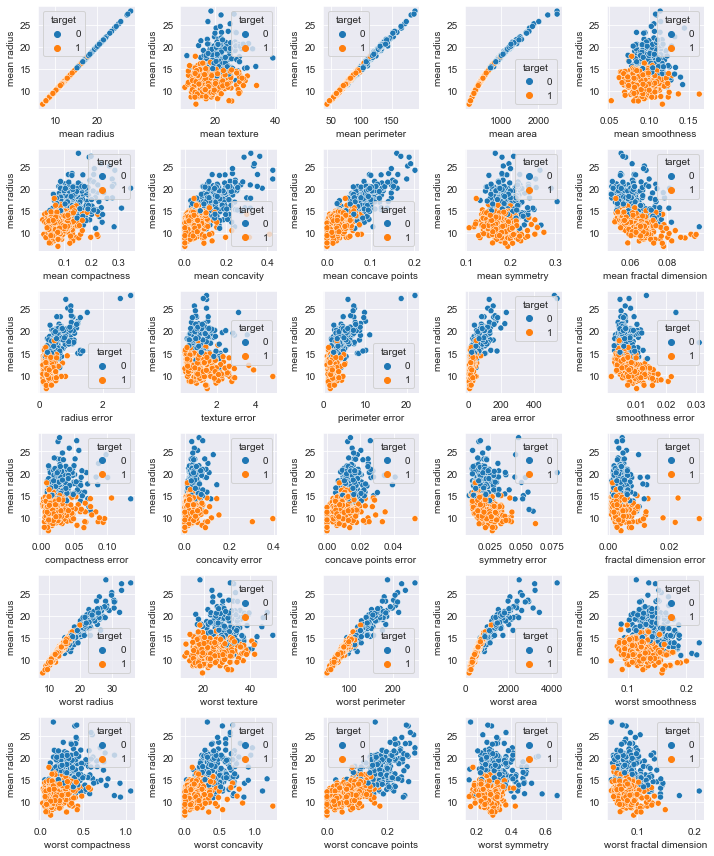

In [6]:
columns = list(data.columns)
plt.figure(figsize=(10,12))
k=1
for col in columns:
  plt.subplot(6,5,k)
  sns.scatterplot(x=col, y='mean radius', hue='target', data=merge)
  k+=1
plt.tight_layout()
plt.show()

Select a few independent features to proceed

In [7]:
# selected features
features = ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 'mean concavity']

X = data[features]
y = target.copy()
X.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity
0,17.99,10.38,0.11840,0.27760,0.3001
1,20.57,17.77,0.08474,0.07864,0.0869
2,19.69,21.25,0.10960,0.15990,0.1974
3,11.42,20.38,0.14250,0.28390,0.2414
4,20.29,14.34,0.10030,0.13280,0.1980


X has all the features and y has the target. If we model with all of the available data, we could not evaluate our model. Hence, it is mandatory to split the available data into training and validation sets. The training set is used to train the model and the validation set will be used to evaluate the trained model.

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=6)


# Logistic Regression using statsmodels library

Logistic Regression can be performed using either SciKit-Learn library or statsmodels library. However, the  math concepts can be explored clearly with statsmodels. 

In [9]:
from statsmodels.api import Logit, add_constant

# add intercept manually
X_train_const = add_constant(X_train)
# build model and fit training data
model_1 = Logit(y_train, X_train_const).fit()
# print the model summary
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.131567
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  455
Model:                          Logit   Df Residuals:                      449
Method:                           MLE   Df Model:                            5
Date:                Fri, 20 May 2022   Pseudo R-squ.:                  0.7954
Time:                        12:05:17   Log-Likelihood:                -59.863
converged:                       True   LL-Null:                       -292.53
Covariance Type:            nonrobust   LLR p-value:                 2.429e-98
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               42.4207      5.769      7.353      0.000      31.113      53.729
mean radius         -1.3898      0.199     -6.972      0.000      -1.781      -0.999
mean texture        -0.3925      0.070     -5.630      0.000      -0.529      -0.256
mean smoothness   -144.5298     28.904     -5.000      0.000    -201.181     -87.879
mean compactness    17.9519     10.278      1.747      0.081      -2.192      38.096
mean concavity     -25.5892      6.044     -4.234      0.000     -37.436     -13.742
====================================================================================

Possibly complete quasi-separation: A fraction 0.18 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

The bias and coefficients of the Logit function are calculated by the Logit Regression using Maximum Likelihood Estimation (MLE). The coefficients in the above output are the bias and the five weights respectively.

The probability distribution of the logit function for training data can be obtained and visualized using the following codes.

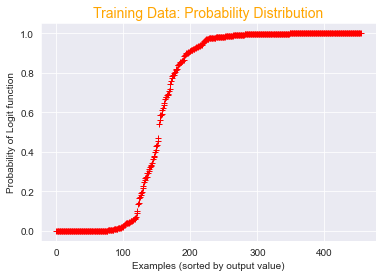

In [10]:
# Probability Distribution for Training data
prob_train = model_1.predict(X_train_const)

# sort the prob dist for visualization
sorted_train = sorted(prob_train.values)
index_train = np.arange(len(sorted_train))
# plot it
plt.plot(index_train, sorted_train, '+r')
plt.title('Training Data: Probability Distribution', size=14, color='orange')
plt.xlabel('Examples (sorted by output value)')
plt.ylabel('Probability of Logit function')
plt.show()

It can be observed that the probability values are pushed close to either 0 or 1. Most of the points are close to 0 or 1, while a few points make the shift from 0 to 1. Moreover, the shift from 0 to 1 is sudden. It helps the model make decisions with more confidence. By default, 0.5 is the decision boundary (or technically called the threshold). Even if this threshold is shifted a little above or below, hardly any point will be differently classified. Let’s predict the probability distribution for the validation data and plot it.

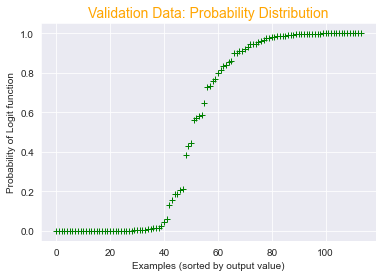

In [11]:
# Probability Distribution for Validation data
X_val_const = add_constant(X_val)
prob_val = model_1.predict(X_val_const)

sorted_val = sorted(prob_val.values)
index_val = np.arange(len(sorted_val))
plt.plot(index_val, sorted_val, '+g')
plt.title('Validation Data: Probability Distribution', size=14, color='orange')
plt.xlabel('Examples (sorted by output value)')
plt.ylabel('Probability of Logit function')
plt.show()

Because of this continuous transition of predicted values from 0 to 1, Logistic Regression is called so, but not Logistic Classification.

Let’s perform classification using the probability distribution. Define 0.5 as threshold and classify data points either as 0 or 1.

In [12]:
threshold = 0.5
y_pred = (prob_val > threshold).astype(np.int8)

Evaluate the model using Accuracy score.

In [13]:
metrics.accuracy_score(y_val,y_pred)

0.9210526315789473

In [14]:
print(metrics.classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        56
           1       0.89      0.97      0.93        58

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



The confusion matrix may give a better insight on performance.

In [15]:
conf = pd.DataFrame(metrics.confusion_matrix(y_val,y_pred), 
                    index=['Actual Malignant', 'Actual Benign'], 
                    columns=['Predicted Malignant', 'Predicted Benign'])
conf

,Predicted Malignant,Predicted Benign
Actual Malignant,49,7
Actual Benign,2,56


It is observed that totally 9 data points are misclassified among 114.

We can try different threshold values manually to check model performance.

In [16]:
accuracies = []
thresholds = np.arange(0.0, 1.01, 0.05)
for th in thresholds:
  y_preds = (prob_val > th).astype(np.int8)
  acc = metrics.accuracy_score(y_val,y_preds)
  accuracies.append(acc)


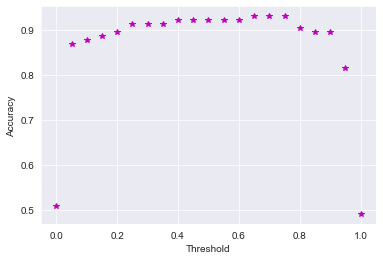

In [17]:
# plot the accuracy values
plt.plot(thresholds, accuracies, '*m')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.show()

# Using SciKit-Learn Library


Logistic Regression is performed with a few lines of code using the SciKit-Learn library.

In [18]:
from sklearn.linear_model import LogisticRegression

model_2 = LogisticRegression(penalty='none')
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_val)
metrics.accuracy_score(y_val, y_pred_2)

0.9210526315789473

Evaluate the model with validation data. Infer predictions with X_train and calculate the accuracy.

In [19]:
print(metrics.classification_report(y_val, y_pred_2))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        56
           1       0.89      0.97      0.93        58

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



Find the probability distribution

In [20]:
model_2.predict_proba(X_val)

array([[9.99833772e-01, 1.66228287e-04],
       [8.15525921e-01, 1.84474079e-01],
       [6.74565871e-03, 9.93254341e-01],
       [2.85436748e-05, 9.99971456e-01],
       [9.82877638e-01, 1.71223616e-02],
       [5.58683569e-02, 9.44131643e-01],
       [1.43619619e-01, 8.56380381e-01],
       [9.99628009e-01, 3.71990684e-04],
       [3.19294286e-03, 9.96807057e-01],
       [2.09638469e-02, 9.79036153e-01],
       [3.60094645e-04, 9.99639905e-01],
       [8.78165670e-02, 9.12183433e-01],
       [1.62058985e-02, 9.83794102e-01],
       [4.13811581e-02, 9.58618842e-01],
       [9.90593642e-01, 9.40635796e-03],
       [9.98322813e-01, 1.67718702e-03],
       [2.65645012e-01, 7.34354988e-01],
       [9.99996104e-01, 3.89610266e-06],
       [2.31178840e-01, 7.68821160e-01],
       [9.99452016e-01, 5.47984250e-04],
       [5.43953159e-02, 9.45604684e-01],
       [9.90078783e-02, 9.00992122e-01],
       [8.14539799e-01, 1.85460201e-01],
       [6.16022437e-01, 3.83977563e-01],
       [9.999917

# Compare both libraries

In [21]:
# y_pred is the prediction of statsmodels library
# y_pred_2 is the prediction of sklearn libray

# Compare both libraries

(y_pred == y_pred_2).all()

True

Please refer these articles:

> * [Beginners Guide to Logistic Regression](https://analyticsindiamag.com/beginners-guide-to-logistic-regression-in-python/)

> * [Important Regression Techniques](https://analyticsindiamag.com/a-beginners-guide-to-regression-techniques/) 


> * [Fake News Classification](https://analyticsindiamag.com/hands-on-guide-to-predict-fake-news-using-logistic-regression-svm-and-naive-bayes-methods/)